In [ ]:
# Import necessary modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_map_zoom 


folder_data = "/Odyssey/private/t22picar/data/glorys_0m/glorys_multivar_0m_2010.nc"
#file_glorys = "cmems_mod_glo_phy_my_0.083deg_P1D-m_multi-vars_180.00W-179.92E_80.00S-90.00N_0.49m_2020-01-20-2021-04-20.nc"

maps = xr.open_dataset(folder_data).sel(time="2010-01-01")
maps

lat = maps.latitude
lon = maps.longitude
ssh = maps.zos


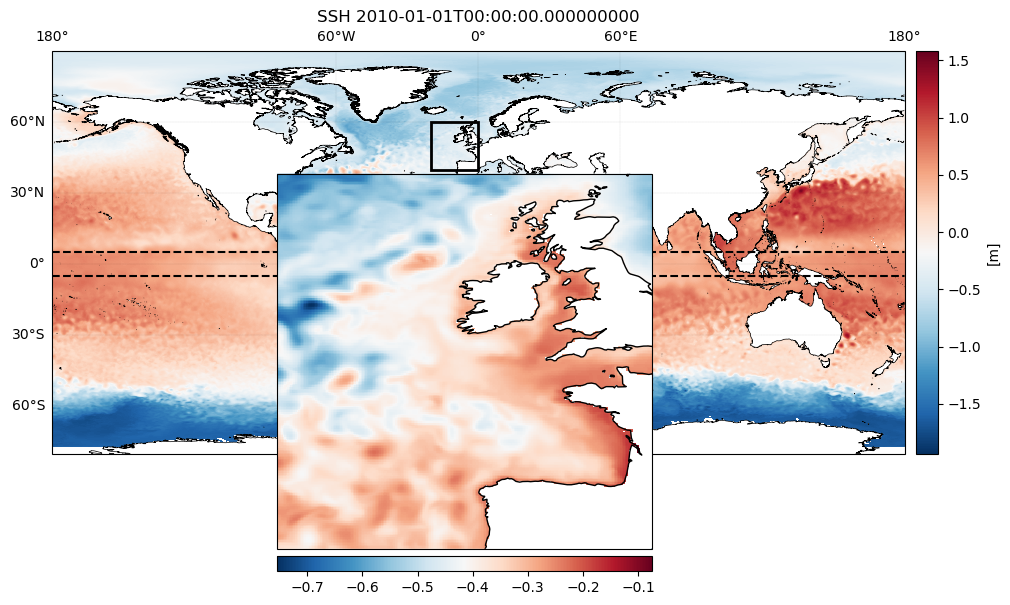

In [9]:
plot_map_zoom(ssh,lon,lat,title="SSH {0}".format(maps.time.values),colorbar_label='[m]')

In [ ]:
ls 

/Odyssey/public/altimetry_traces/2010_2023/gridded/l3_mask.nc


In [45]:
folder_data = "/Odyssey/public/altimetry_traces/2010_2023/gridded/l3_mask.nc"

#folder_data = "/Odyssey/public/altimetry_traces/gridded.nc"
#folder_data = "/Odyssey/public/altimetry_traces/2010_2023/
maps_sat = xr.open_dataset(folder_data).sel(time="2019-01-01")
maps_sat


<xarray.Dataset> Size: 4MB
Dimensions:  (lon: 1440, lat: 720)
Coordinates:
    time     datetime64[ns] 8B 2019-01-01
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75
Data variables:
    l3_mask  (lat, lon) float32 4MB ...
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Aug 11 14:56:30 2025: cdo -f nc -expr,l3_mask=(sla_filt...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

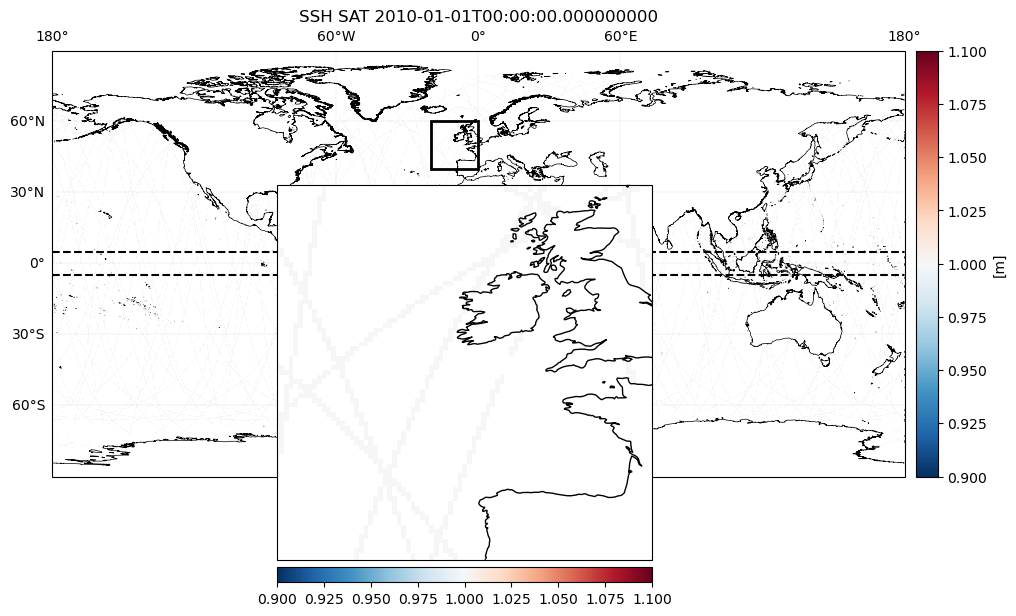

In [46]:
plot_map_zoom(maps_sat.l3_mask,maps_sat.lon,maps_sat.lat,title="SSH SAT {0}".format(maps.time.values),colorbar_label='[m]')

In [35]:
folder_data = "/Odyssey/public/altimetry_traces/2010_2023/gridded/sla_l3_all_2010_2023_0.25deg_convl4.nc"

#folder_data = "/Odyssey/public/altimetry_traces/gridded.nc"
#folder_data = "/Odyssey/public/altimetry_traces/2010_2023/
maps_sat = xr.open_dataset(folder_data).sel(time="2019-01-01")
maps_sat


<xarray.Dataset> Size: 21MB
Dimensions:         (lat: 720, lon: 1440)
Coordinates:
    time            datetime64[ns] 8B 2019-01-01
  * lat             (lat) float64 6kB -90.0 -89.75 -89.5 ... 89.25 89.5 89.75
  * lon             (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Data variables:
    mdt             (lat, lon) float32 4MB ...
    sla_filtered    (lat, lon) float32 4MB ...
    ssh             (lat, lon) float32 4MB ...
    sla_unfiltered  (lat, lon) float32 4MB ...
    lwe             (lat, lon) float32 4MB ...

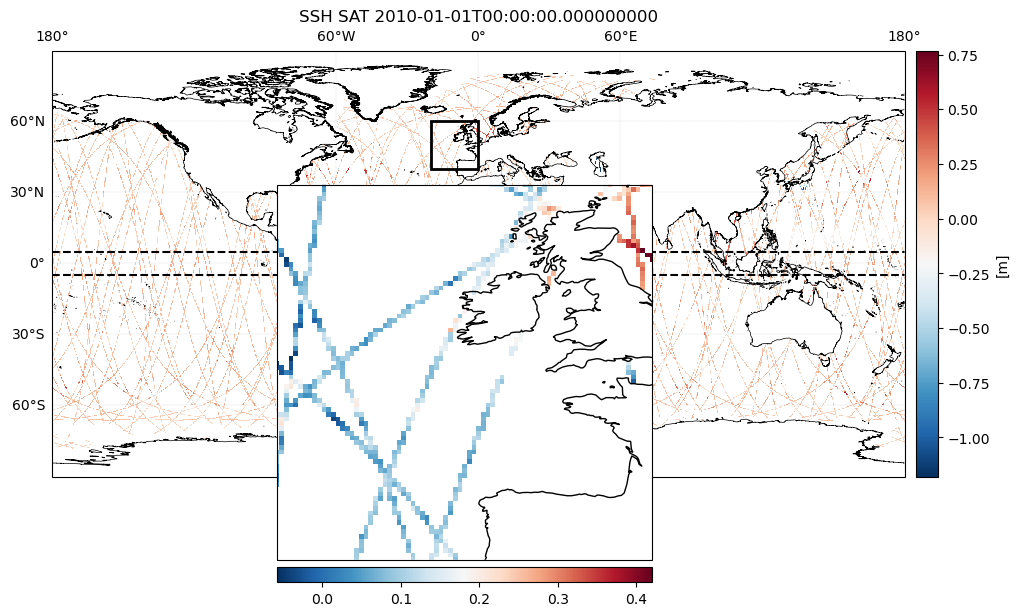

In [36]:
plot_map_zoom(maps_sat.sla_unfiltered,maps_sat.lon,maps_sat.lat,title="SSH SAT {0}".format(maps.time.values),colorbar_label='[m]')

In [39]:
maps_int = maps.interp({"latitude":maps_sat.lat, "longitude":maps_sat.lon}, method="linear")

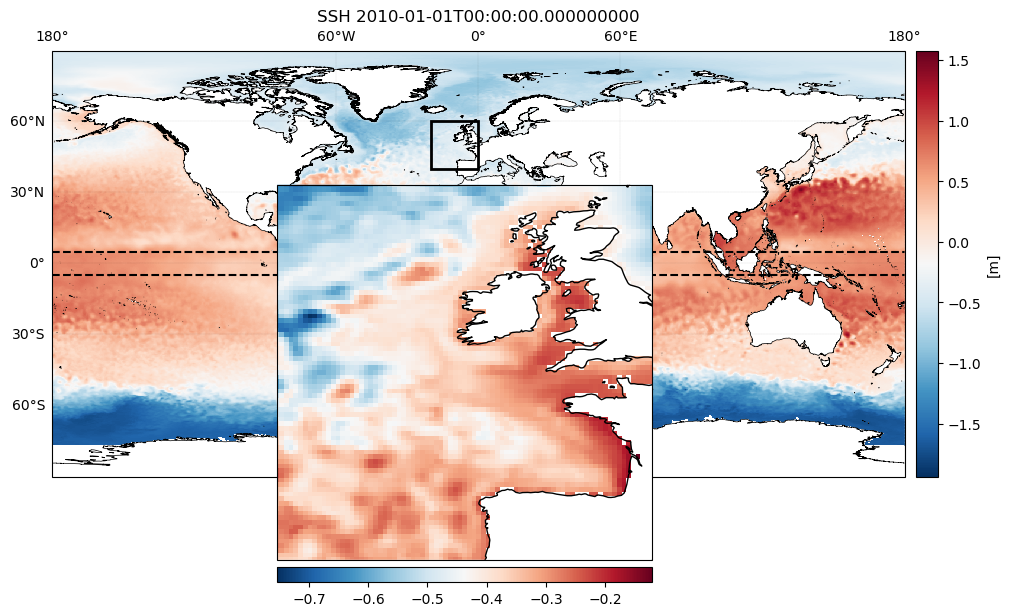

In [41]:
plot_map_zoom(maps_int.zos,maps_int.lon,maps_int.lat,title="SSH {0}".format(maps.time.values),colorbar_label='[m]')

In [43]:
maps_int = xr.where(np.isnan(maps_sat.sla_unfiltered),np.nan,maps_int)

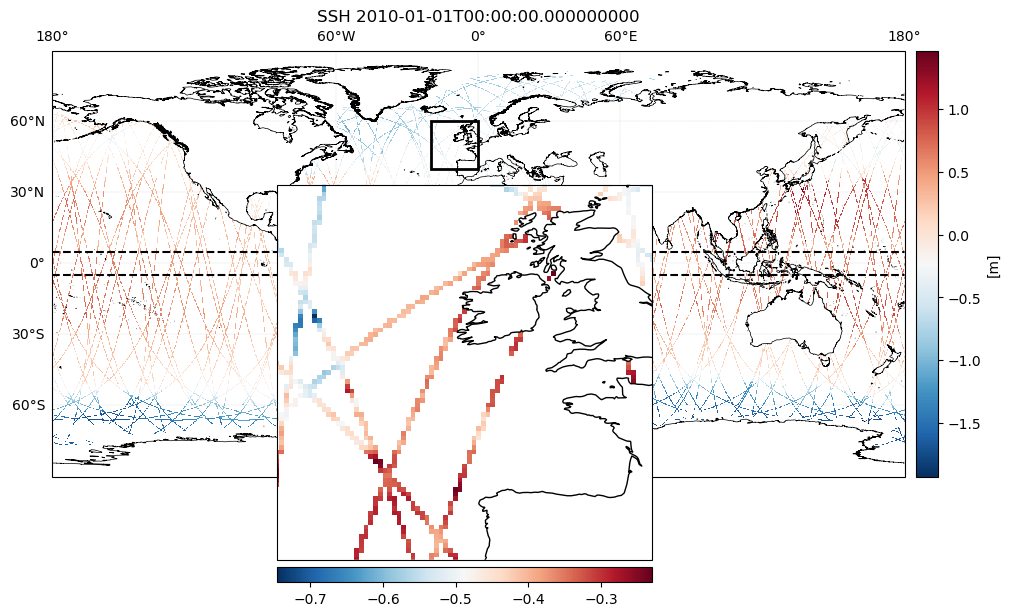

In [44]:
plot_map_zoom(maps_int.zos,maps_int.lon,maps_int.lat,title="SSH {0}".format(maps.time.values),colorbar_label='[m]')

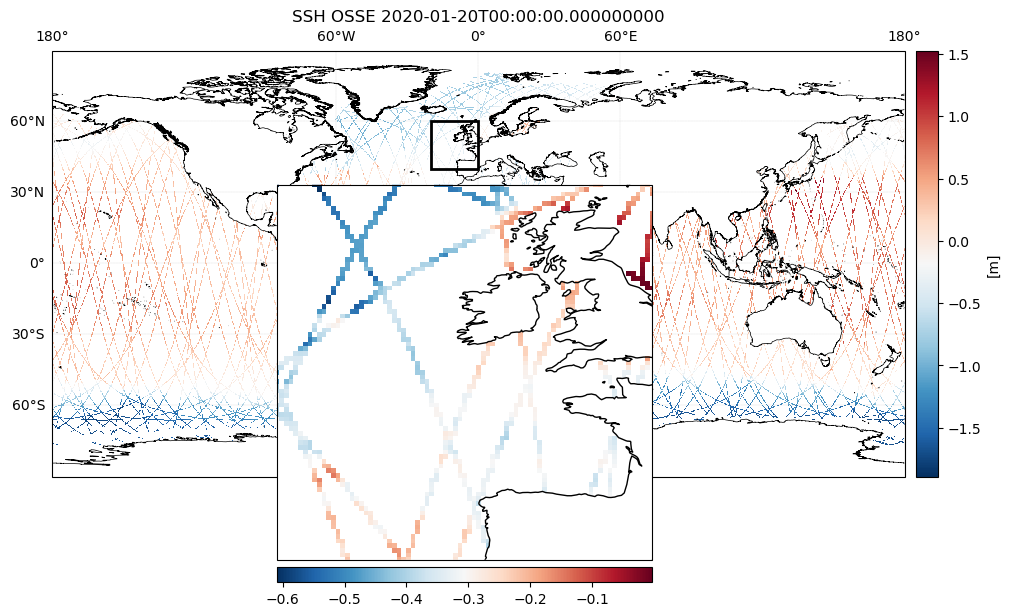

In [7]:
plot_map_zoom(ssh_simu_i,lon_alti,lat_alti,title="SSH OSSE {0}".format(maps.time.values[0]),colorbar_label='[m]')